In [1]:
import numpy as np

In [2]:
from scipy import signal

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.integrate import odeint

In [5]:
Kp = 2.0
tau = 1.0
zeta = 0.25
theta = 0.0
du = 1.0

In [35]:
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1,T=np.linspace(0,100,300))

In [23]:
A = [[0.0, 1.0],[-1.0/tau**2, -2.0*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

In [24]:
def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt, dy2dt2]
t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]

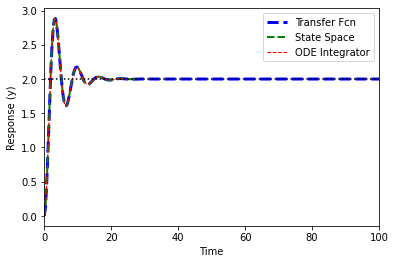

In [34]:
plt.figure(1)
plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,'g--',linewidth=2,label='State Space')
plt.plot(t3,y3,'r--',linewidth=1,label='ODE Integrator')
y_ss = Kp*du
plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()